In [ ]:
!pip install --upgrade mplfinance


In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import mplfinance as mpl
import matplotlib.dates as mdates

In [11]:
style.use('ggplot')

start = dt.datetime(2015, 7, 22)
end = dt.datetime(2020, 7, 22)

df = web.DataReader('HDFCBANK.NS', 'yahoo', start, end)
df.to_csv('HDFC-5-yr-Stocks.csv')

<IPython.core.display.Javascript object>


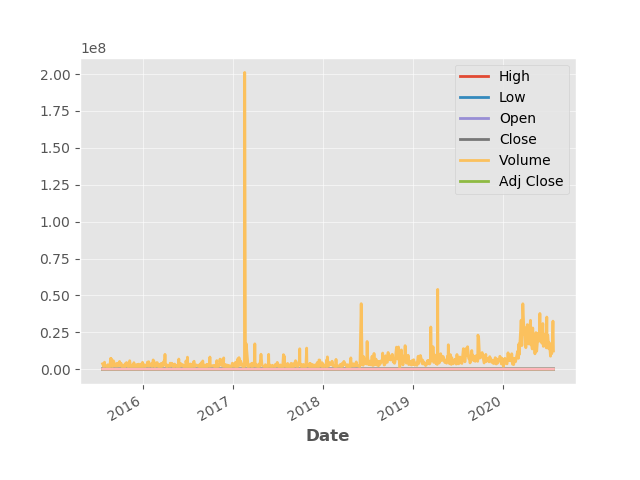

In [12]:
df = pd.read_csv('HDFC-5-yr-Stocks.csv', parse_dates=True, index_col=0)
# df = df.set_index(['Date'])
df.plot()

## Util for converting index to Date Format

> You can specify moving avg as mav

In [14]:
# df['Adj Close'].plot()
# mpl.plot(df)
# df
%matplotlib notebook
# df1 = df
# df1
# 
# df1.index = pd.to_datetime(df1.index)
# df1
# mpl.plot(df1.head(100), type = 'candle', mav = 10)
# df

## Calculate 100 moving average

<IPython.core.display.Javascript object>


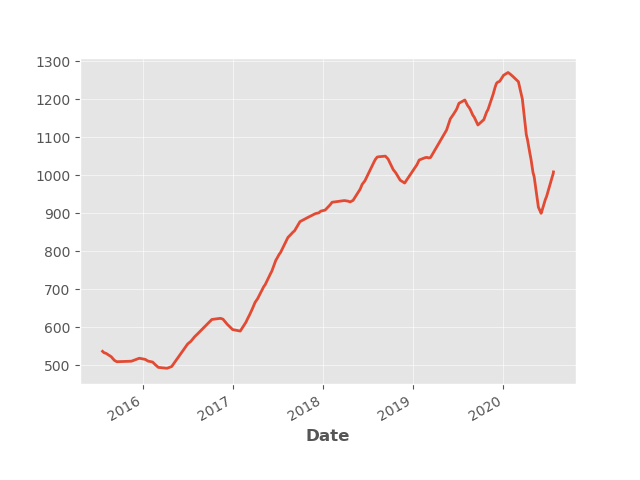

In [15]:
df['100 ma'] = df['Adj Close'].rolling(window = 50, min_periods = 0).mean()
df['100 ma'].plot(label='ma')

## SubPlots

In [8]:
ax1 = plt.subplot2grid((6,1), (0, 0), rowspan=5)
ax2 = plt.subplot2grid((6,1), (5, 0))
ax1.plot(df.index, df["Adj Close"], label = 'Adj close')
ax1.plot(df.index, df["100 ma"], label = 'ma')
ax2.margins(0,.1)
ax2.bar(df.index, df['Volume'])


<BarContainer object of 1229 artists>

## Resampling 10 day frame If you need ohlc

<IPython.core.display.Javascript object>


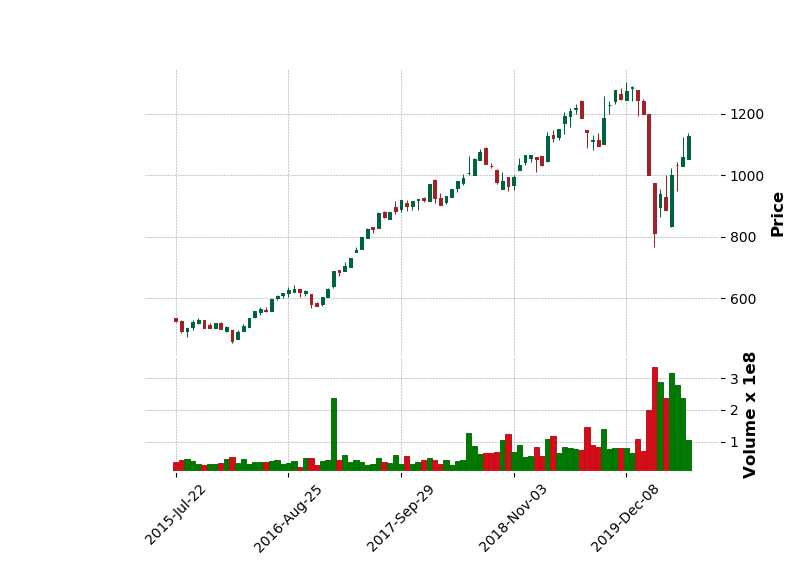

In [31]:
df.index = pd.to_datetime(df.index)
df_ohlc = df['Adj Close'].resample('20D').ohlc()
# df_ohlc.reset_index(inplace = True)
df_ohlc["volume"] = df["Volume"].resample('20D').sum()
mpl.plot(df_ohlc, type = 'candle', style = 'charles', volume = True)

## mplfinance library does everything automatically

<IPython.core.display.Javascript object>


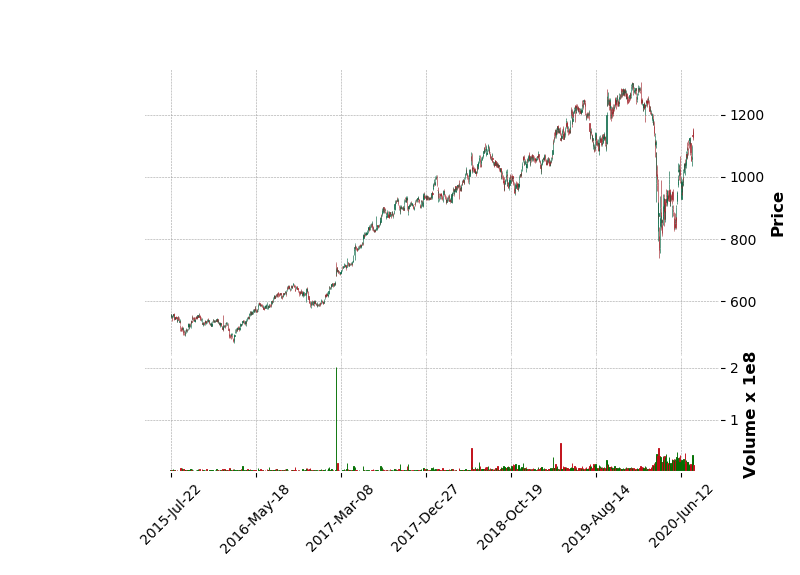

In [22]:
mpl.plot(df,type = 'candle', style = 'charles', volume = True)